Accuracy: 100.0 %


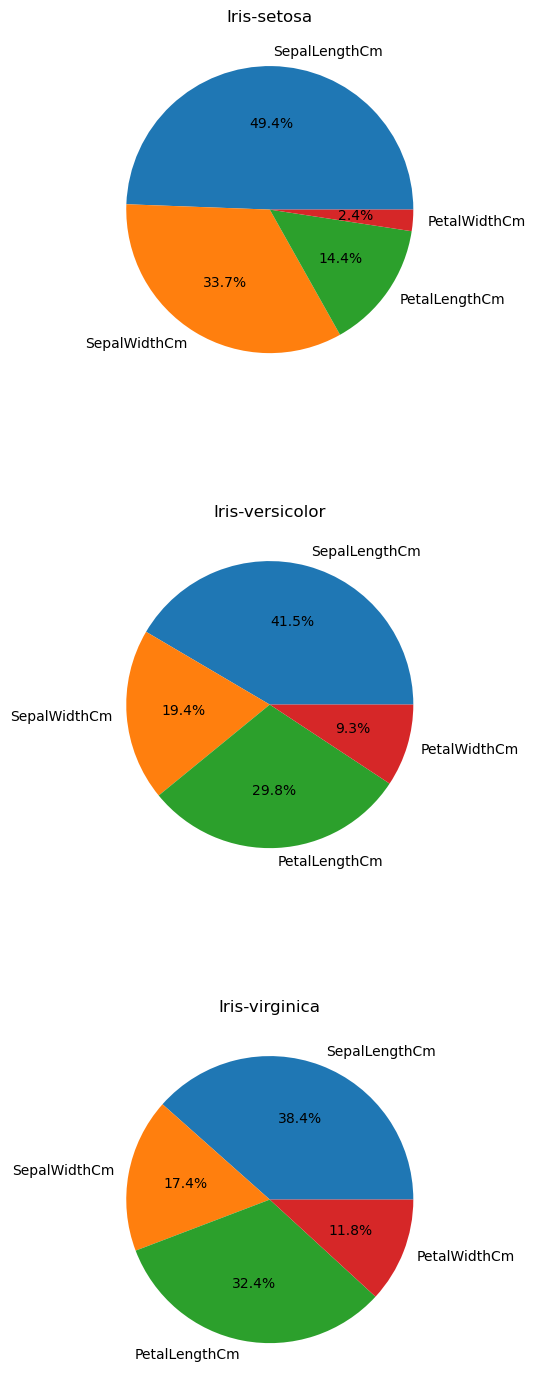

Enter sepal length: 


 5.2


Enter sepal width: 


 3


Enter petal length: 


 1


Enter petal width: 


 0.2



Flower according to description:
Iris-setosa = 100.00%
Iris-versicolor = 0.00%
Iris-virginica = 0.00%


C:\Anaconda\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load the dataset
data = pd.read_csv('DataSet/irish_dataset.csv')

# Split features and labels
X = data.drop('Species', axis=1)
y = data['Species']

# Encode categorical labels
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Decision Tree classifier
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)  # Train the classifier on the entire dataset

# Make predictions
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy*100, "%")

# Extract data for each species
species_data = {'Iris-setosa': data[data['Species'] == 'Iris-setosa'],
                'Iris-versicolor': data[data['Species'] == 'Iris-versicolor'],
                'Iris-virginica': data[data['Species'] == 'Iris-virginica']}

# Calculate mean values for each species
species_means = {species: species_data[species].drop('Species', axis=1).mean() for species in species_data}

# Create pie charts
fig, axs = plt.subplots(len(species_means), 1, figsize=(5, 5*len(species_means)))

for i, species in enumerate(species_means):
    axs[i].pie(species_means[species], labels=species_means[species].index, autopct='%1.1f%%')
    axs[i].set_title(species)

plt.tight_layout()
plt.show()


# Function to calculate accuracy percentage for each species
def calculate_accuracy(sepal_length, sepal_width, petal_length, petal_width):
    user_input = [[sepal_length, sepal_width, petal_length, petal_width]]
    prediction = clf.predict(user_input)
    probabilities = clf.predict_proba(user_input)[0]
    total = sum(probabilities)
    accuracy_percentages = [prob / total * 100 for prob in probabilities]
    return(prediction, accuracy_percentages)

# Function to display accuracy percentages
def display_accuracy(prediction, accuracy_percentages):
    classes = label_encoder.classes_
    print("\nFlower according to description:")
    for i, class_ in enumerate(classes):
        print("{} = {:.2f}%".format(class_, accuracy_percentages[i]))

print("Enter sepal length: ")
sepal_length = float(input())

print("Enter sepal width: ")
sepal_width = float(input())

print("Enter petal length: ")
petal_length = float(input())

print("Enter petal width: ")
petal_width = float(input())

prediction, accuracy_percentages = calculate_accuracy(sepal_length, sepal_width, petal_length, petal_width)

display_accuracy(prediction, accuracy_percentages)